# Actual vs Expected

In [1]:
import chainladder as cl

This example demonstrates how you can slice triangle objects to perform a
typical 'Actual vs Expected' analysis.  We will use Medical Malpractice
payment patterns for the demonstration.

In [2]:
tri_1997 = cl.load_sample('clrd')
tri_1997 = tri_1997.groupby('LOB').sum().loc['medmal']['CumPaidLoss']

Actual vs Expected analysis is an analysis of a model in the presence of new data.  Let's remove the latest diagonal of our Triangle and conduct the analysis and retain the vector of losses expected in the following period, in this case, calendar year 1997.

In [3]:
# Create a triangle as of the previous valuation and build IBNR model
tri_1996 = tri_1997[tri_1997.valuation < '1997']
model_1996 = cl.Chainladder().fit(cl.TailCurve().fit_transform(tri_1996))

# Slice the expected losses from the 1997 calendar period of the model
ave = model_1996.full_triangle_.dev_to_val()
ave = ave[ave.valuation==tri_1997.valuation_date].rename('columns', 'Expected')

Finally, we can compare our expectation vs the actual emerged diagonal to see where our model over/under-predicted the actual data.

Text(0, 0.5, 'Origin')

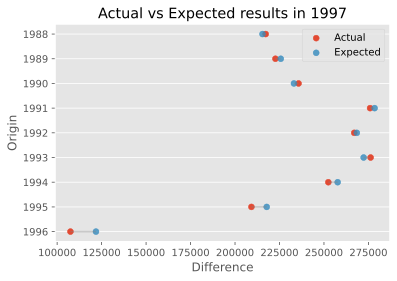

In [4]:
# Slice the actual losses from the 1997 calendar period for prior AYs
ave['Actual'] = tri_1997.latest_diagonal[tri_1997.origin < '1997']
df = ave.to_frame().T.iloc[::-1]

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plotting
fig, ax = plt.subplots()
ax.grid(axis='x')
plt.hlines(
    y=df.index.astype(str), 
    xmin=df['Actual'], 
    xmax=df['Expected'],
    color='grey', alpha=0.4)
plt.scatter(df['Actual'], df.index.astype(str), alpha=1, label='Actual')
plt.scatter(df['Expected'], df.index.astype(str), alpha=0.8 , label='Expected')
plt.legend()
plt.title("Actual vs Expected results in 1997")
plt.xlabel('Difference')
plt.ylabel('Origin');

In [5]:
from myst_nb import glue
glue("plot_ave_analysis", fig, display=False)